# Shor's Quantum Error Correcting Code
Below is the circuit which performs single bit flips, phase shifts, and the combination of bit flip and phase shift on a single qubit. The encoding circuit on qubits 0, 3, and 6 with the Hadamard gates corrects for single qubit phase shifts. The three inner encoding circuits on bits 0-2, 3-5, and 6-9 automatically correct for single bit flips via the Toffoli gate. The entire circuit is then decoded and a Toffoli gate is used to automatically correct the phase flip.

In [1]:
import math
import random

from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram
from IPython.display import display, Markdown

simulator = Aer.get_backend("statevector_simulator")

The input state of the first qubit was: $0.5000|0\rangle + 0.8660|0 \rangle$

The final state of the first qubit is: $0.5000|0\rangle + 0.8660|0 \rangle$

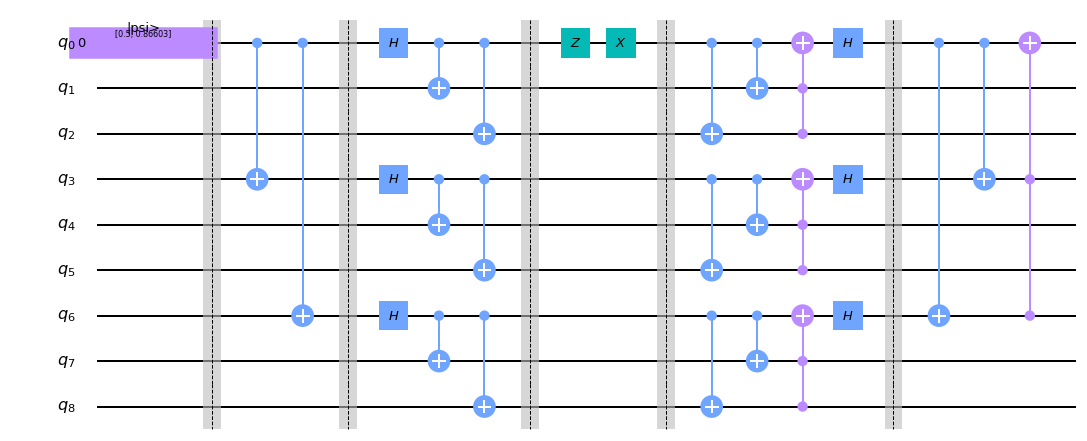

In [3]:
num_qubits = 9  
circuit = QuantumCircuit(num_qubits)

# Initialize our first qubit so we can track it's state
input_state = [1/2, math.sqrt(3)/math.sqrt(4)]
circuit.initialize(input_state, circuit.qubits[0])
circuit.barrier()

# Shore encoding circuit
circuit.cx(0, 3)
circuit.cx(0, 6)
circuit.barrier()
for i in range(0, num_qubits, 3):
    circuit.h(i)
    circuit.cx(i, i+1)
    circuit.cx(i, i+2)

# Random single bit phase shift or bit flip or both!
circuit.barrier()
rand_ops = random.choice([["x"], ["z"], ["z", "x"]])
for op in rand_ops:
    getattr(circuit, op)(0)
circuit.barrier()

# Shor decoding circuit
for i in range(0, num_qubits, 3):       
    circuit.cx(i, i+2)
    circuit.cx(i, i+1)
    circuit.ccx(i+2, i+1, i)
    circuit.h(i)
circuit.barrier()
circuit.cx(0, 6)
circuit.cx(0, 3)

# Autocorrecting Toffoli
circuit.ccx(6, 3, 0)

# Evaluate the output state vector
job = execute(circuit, simulator)
result = job.result()
state_vector = result.get_statevector()
output_state = state_vector[state_vector.nonzero()]
alpha, beta = output_state.real
display(Markdown(fr"The input state of the first qubit was: ${input_state[0]:0.4f}|0\rangle + {input_state[1]:0.4f}|0 \rangle$"))
display(Markdown(fr"The final state of the first qubit is: ${alpha:0.4f}|0\rangle + {beta:0.4f}|0 \rangle$"))
display(circuit.draw())